## Question 1

Text(0.5, 1.0, 'Transformed Image')

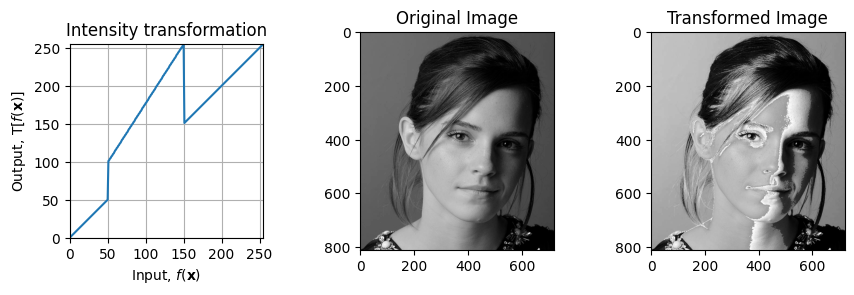

In [194]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)    

# Matrix to define the transformation
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Defining the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

# Concatenate the linear transformations to create the transformation
transform = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype('uint8')

# Applying the transformation
img_transformed = cv.LUT(img, transform)

f, ax = plt.subplots(1,3, figsize = (10,6))
plt.subplots_adjust(wspace=0.5)

ax[0].plot(transform)
ax[0].set_title("Intensity transformation")
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[0].set_xticks(range(0,256,50))
ax[0].set_yticks(range(0,256,50))

ax[1].imshow(img, cmap = 'gray')
ax[1].set_title('Original Image')

ax[2].imshow(img_transformed, cmap = 'gray')
ax[2].set_title('Transformed Image')

## Question 2

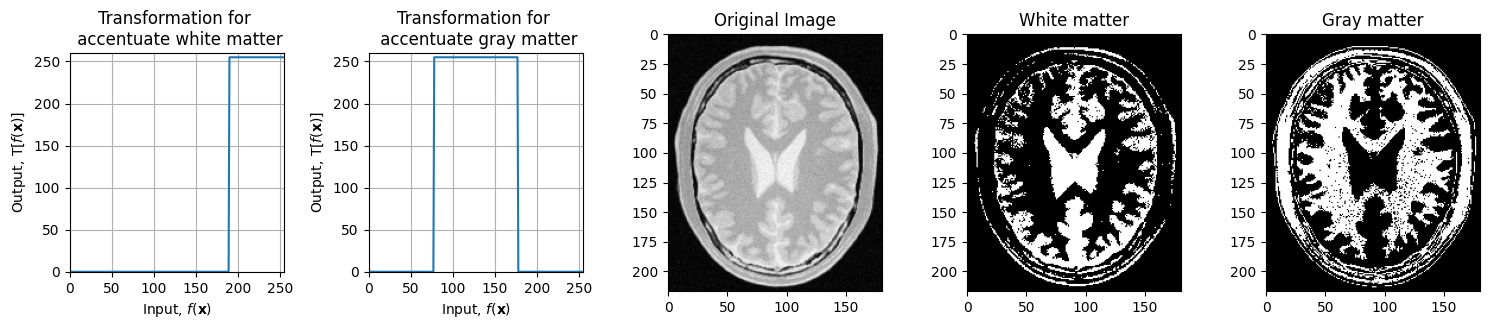

In [220]:
# Defining the transform to accentuate white matter
t1 = np.zeros(190)
t2 = 255*np.ones(66)
transform_white = np.concatenate((t1,t2), axis = 0).astype('uint8')
# Defining the transform to accentuate gray matter
t3 = np.zeros(78)
t4 = 255*np.ones(100)
t5 = np.zeros(78)
transform_gray = np.concatenate((t3,t4,t5), axis = 0).astype('uint8')

# Load the image of the brain proton
img = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

img_tr_white = cv.LUT(img, transform_white)
img_tr_gray = cv.LUT(img, transform_gray)

f, ax = plt.subplots(1,5, figsize = (15,15))
plt.subplots_adjust(wspace=0.5)

ax[0].plot(transform_white)
ax[0].set_title("Transformation for \n accentuate white matter")
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,260)
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[0].set_xticks(range(0,256,50))
ax[0].set_yticks(range(0,256,50))

ax[1].plot(transform_gray)
ax[1].set_title("Transformation for \n accentuate gray matter")
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,260)
ax[1].set_aspect('equal')
ax[1].grid(True)
ax[1].set_xticks(range(0,256,50))
ax[1].set_yticks(range(0,256,50))

ax[2].imshow(img, cmap = 'gray')
ax[2].set_title('Original Image')

ax[3].imshow(img_tr_white, cmap = 'gray')
ax[3].set_title('White matter')

ax[4].imshow(img_tr_gray, cmap = 'gray')
ax[4].set_title('Gray matter')

plt.tight_layout()

## Question 3

C:\Users\Kavindu Dushmantha\AppData\Local\Temp\ipykernel_18952\42154574.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


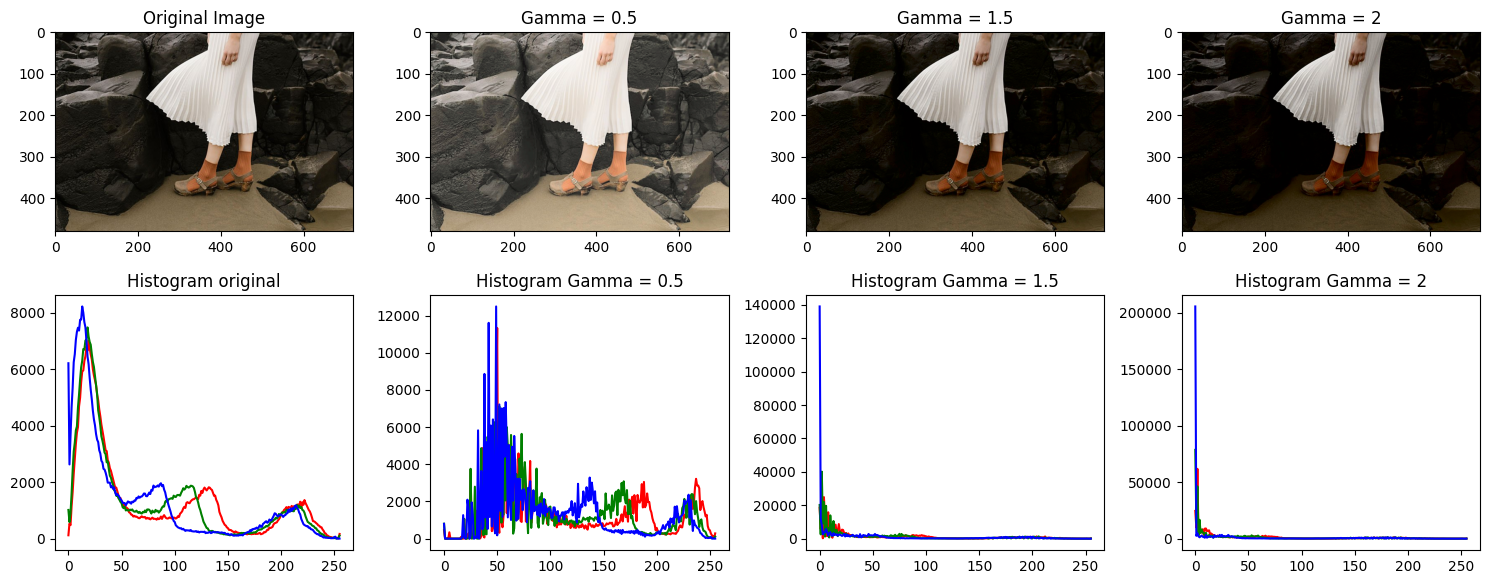

In [196]:
# Load the image
img_bgr = cv.imread('highlights_and_shadows.jpg')
img_ori = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convert the image to L*a*b* color space
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)

# Extract the L channel
L_channel = img_lab[:,:,0]

# Apply gamma correction to the L channel
gamma_values = [0.5,1.5, 2]
color = ('r', 'g', 'b')

f, ax = plt.subplots(2,4, figsize = (15,6))

for i, c in enumerate(color):
  hist_ori = cv.calcHist([img_ori], [i], None, [256], [0, 256])
  ax[1,0].plot(hist_ori, color = c)
  ax[1,0].set_title('Histogram original')

ax[0,0].imshow(img_ori, cmap = 'gray')
ax[0,0].set_title('Original Image')

# Try gamma correction for different values
for gamma in range(len(gamma_values)):
  table = np.array([(i/255.0)**(gamma_values[gamma])*255.0 for i in np.arange(0, 256)]).astype('uint8')
  L_corrected = cv.LUT(L_channel, table)

# Replace the corrected L channel in the image
  img_lab_corrected = img_lab.copy()
  img_lab_corrected[:,:,0] = L_corrected

# Convert the corrected image back to BGR format
  img_corrected_bgr = cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2BGR)
  img_corrected_rgb = cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB)

  for i, c in enumerate(color):
    hist_gamma = cv.calcHist([img_corrected_rgb], [i], None, [256], [0, 256])
    ax[1,gamma+1].plot(hist_gamma, color = c)
    ax[1,gamma+1].set_title('Histogram Gamma = ' + str(gamma_values[gamma]))

  ax[0,gamma+1].imshow(img_corrected_rgb, cmap = 'gray')
  ax[0,gamma+1].set_title('Gamma = ' + str(gamma_values[gamma]))

  plt.tight_layout()

## Question 04

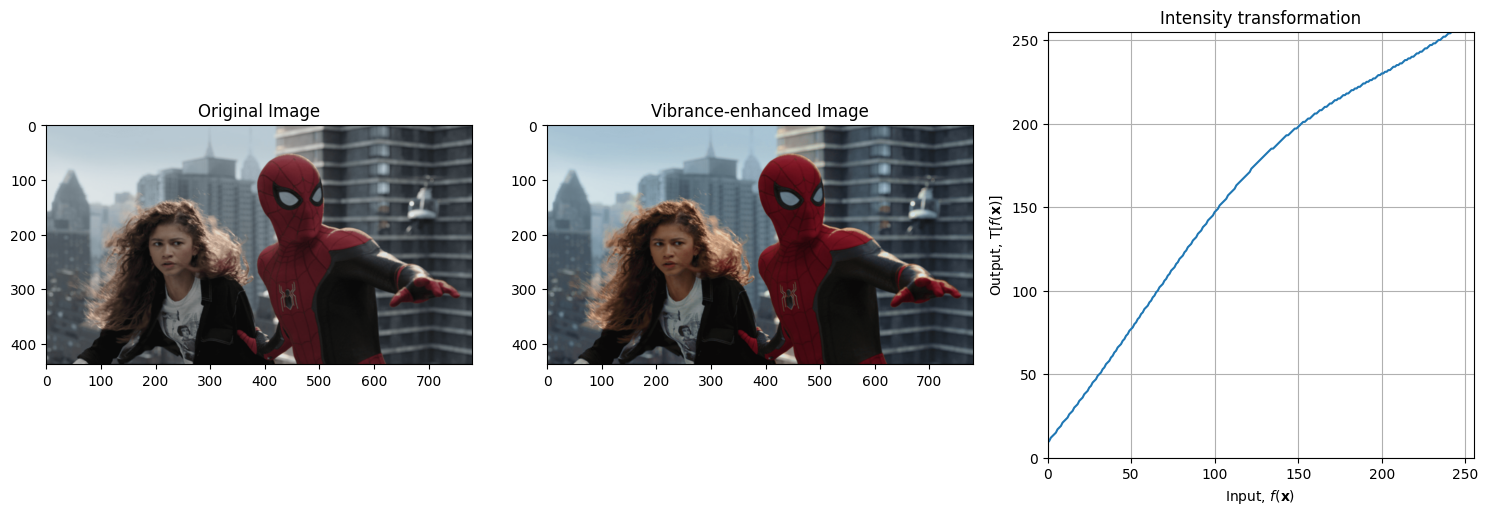

In [197]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_bgr = cv2.imread('spider.png')

# Convert to HSV (Hue, Saturation and Value) color space
img_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Spliting the image into hue, saturation and value planes
H_channel, S_channel, V_channel = cv2.split(img_hsv)

# Applying the intensity transormation to the saturation plane
sigma = 70
a = 0.4       # select a value between [0,1]

#Defining the tramsform
transform = np.array([min(x+ (a*128*np.exp((-(x-128)**2)/(2*(sigma**2)))), 255) for x in np.arange(0,256)]).astype('uint8')

# Applying transform and recombining the three planes
transform_S = cv.LUT(S_channel, transform)
img_transformed = cv.merge((H_channel, transform_S, V_channel))

# Convert back to RGB color space
transformed_rgb_image = cv2.cvtColor(img_transformed, cv2.COLOR_HSV2RGB)

# Display original and vibrance-enhanced images
fig, ax = plt.subplots(1,3, figsize = (15,6))

ax[0].imshow(img_original)
ax[0].set_title('Original Image')

ax[1].imshow(transformed_rgb_image)
ax[1].set_title('Vibrance-enhanced Image')

# Displaying the intensity transformation
ax[2].plot(transform.flatten())
ax[2].set_title("Intensity transformation")
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
ax[2].grid(True)
ax[2].set_xticks(range(0,256,50))
ax[2].set_yticks(range(0,256,50))

plt.tight_layout()

## Question 05

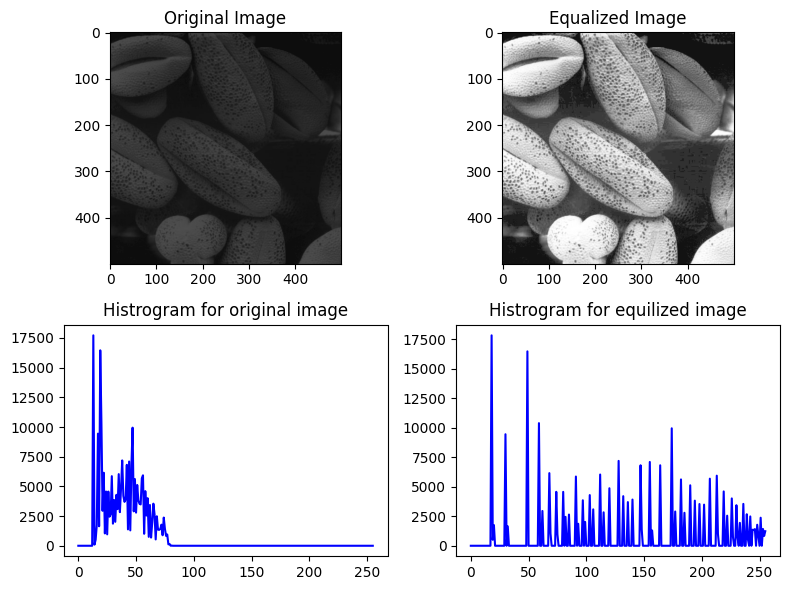

In [226]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('shells.tif', cv.IMREAD_COLOR)

# Definind the histogram equilization function
def histogram_equalization(input_image):
    # Split the input image into its color channels
    blue, green, red = cv.split(input_image)
    h, w = input_image.shape[:2]
    total_pixels = h * w
    L = 256
    color_palette = np.array([])

    for channel_index, color in enumerate(('Blue', 'Green', 'Red')):
        hist_original = cv.calcHist([input_image], [channel_index], None, [L], [0, L])
        hist_cumsum = np.cumsum(hist_original)
        hist_cumsum = hist_cumsum * ((L - 1) / total_pixels)
        rounded_cumsum = np.round(hist_cumsum).astype('uint8')
        color_palette = np.append(color_palette, rounded_cumsum)
    eq_blue = cv.LUT(blue, color_palette[0:L])
    eq_green = cv.LUT(green, color_palette[L:L * 2])
    eq_red = cv.LUT(red, color_palette[L * 2:L * 3])

    eq_image = cv.merge((eq_blue, eq_green, eq_red)).astype('uint8')
    eq_image = cv.cvtColor(eq_image, cv.COLOR_BGR2RGB)

    return eq_image

img_equalize = histogram_equalization(img_orig)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

f, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].imshow(img_orig)
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(img_equalize)
ax[0, 1].set_title('Equalized Image')

hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])
ax[1, 0].plot(hist_orig, color='blue')
ax[1, 0].set_title('Histrogram for original image')
hist_equalize = cv.calcHist([img_equalize], [0], None, [256], [0, 256])
ax[1, 1].plot(hist_equalize, color='blue')
ax[1, 1].set_title('Histrogram for equilized image')

plt.tight_layout()  # Adjusts spacing between subplots for better visibility
plt.show()
    



## Question 06

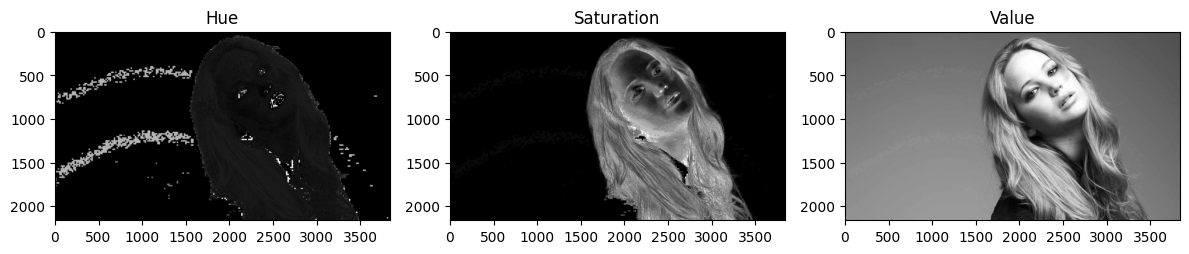

In [209]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
image = img_orig
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)

# Spliting the image into hue, saturation and value planes
hue, saturation, value = cv.split(img_hsv)

# Display the channels
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.tight_layout()
plt.show()

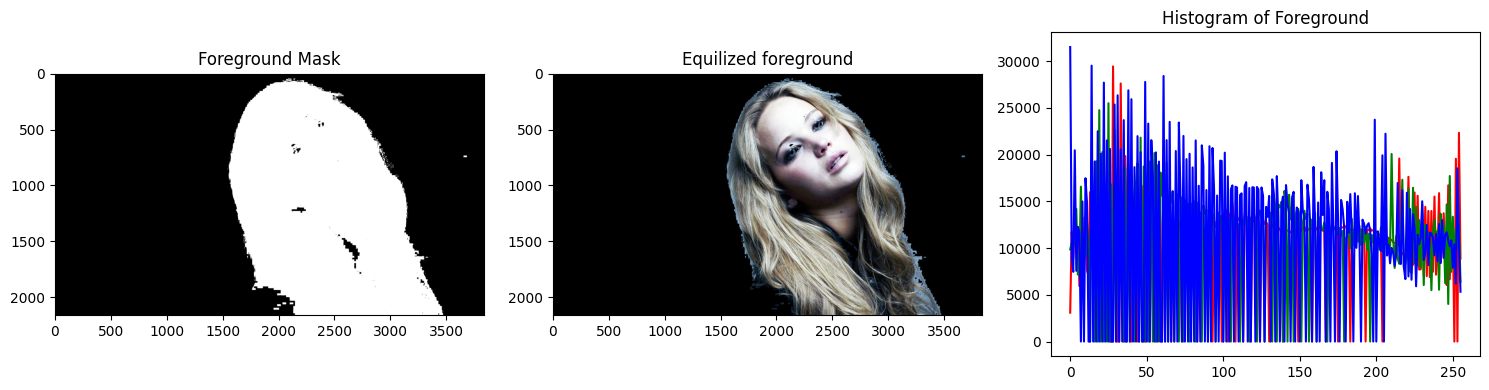

In [210]:
img, mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)

h_foreground = cv.bitwise_and(hue, hue, mask=mask)
s_foreground = cv.bitwise_and(saturation, saturation, mask=mask)
v_foreground = cv.bitwise_and(value, value, mask=mask)
foreground = cv.merge((h_foreground, s_foreground, v_foreground))
img_foreground = cv.cvtColor(foreground, cv.COLOR_HSV2RGB)

f, ax = plt.subplots(1,3 , figsize = (15,4))
# Display the histogram
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Foreground Mask')

R, G, B = cv.split(img_foreground)
R_equalize =  cv.equalizeHist(R)
G_equalize =  cv.equalizeHist(G)
B_equalize =  cv.equalizeHist(B)

img_equalize = cv.merge([R_equalize, G_equalize, B_equalize])

hist_r = cv.calcHist([img_equalize], [0], mask, [256], [0, 256])
hist_g = cv.calcHist([img_equalize], [1], mask, [256], [0, 256])
hist_b = cv.calcHist([img_equalize], [2], mask, [256], [0, 256])

ax[1].imshow(img_equalize)
ax[1].set_title('Equilized foreground')

ax[2].plot(hist_r, color='red')
ax[2].plot(hist_g, color='green')
ax[2].plot(hist_b, color='blue')
ax[2].set_title('Histogram of Foreground')

plt.tight_layout()
plt.show()

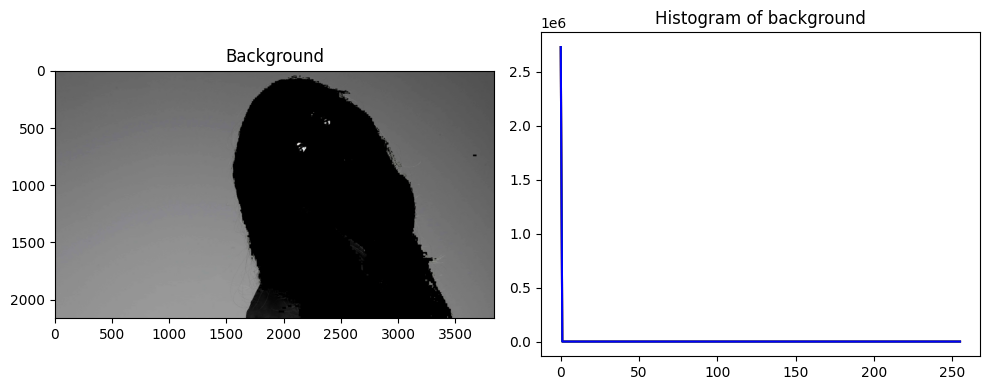

In [217]:
h_background = cv.bitwise_and(hue, hue, mask=~mask)
s_background = cv.bitwise_and(saturation, saturation, mask=~mask)
v_background = cv.bitwise_and(value, value, mask=~mask)
background = cv.merge((h_background, s_background, v_background))
img_background = cv.cvtColor(background, cv.COLOR_HSV2RGB)

hist_r = cv.calcHist([img_background], [0], mask, [256], [0, 256])
hist_g = cv.calcHist([img_background], [1], mask, [256], [0, 256])
hist_b = cv.calcHist([img_background], [2], mask, [256], [0, 256])

f, ax = plt.subplots(1,2 , figsize = (10,4))
# Display the histogram
ax[0].imshow(img_background)
ax[0].set_title('Background')

ax[1].plot(hist_r, color='red')
ax[1].plot(hist_g, color='green')
ax[1].plot(hist_b, color='blue')
ax[1].set_title('Histogram of background')

plt.tight_layout()
plt.show()

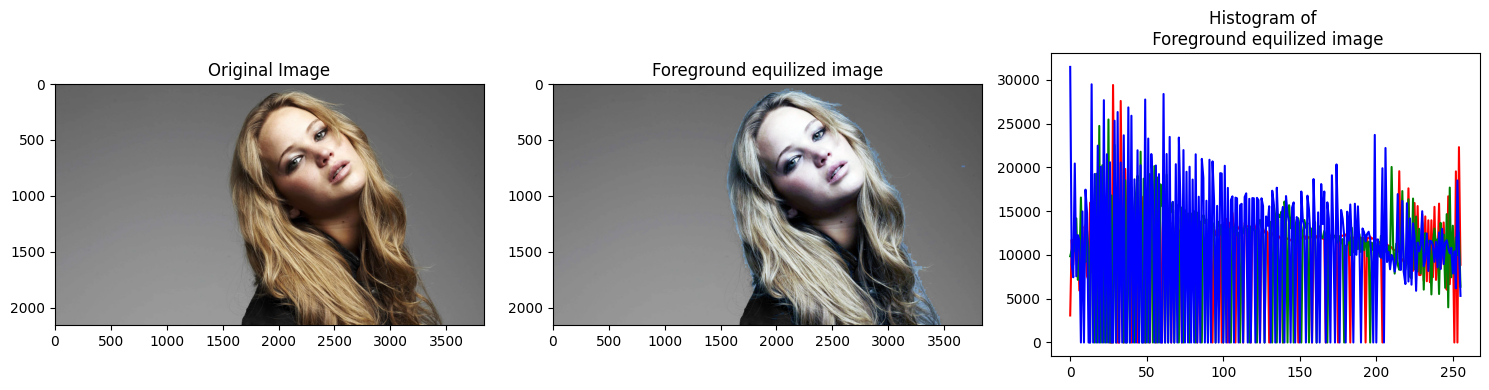

In [212]:
final_image = cv.add(img_equalize, img_background)

hist_r = cv.calcHist([final_image], [0], mask, [256], [0, 256])
hist_g = cv.calcHist([final_image], [1], mask, [256], [0, 256])
hist_b = cv.calcHist([final_image], [2], mask, [256], [0, 256])

f, ax = plt.subplots(1,3 , figsize = (15,4))
# Display the histogram
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(final_image)
ax[1].set_title('Foreground equilized image')

ax[2].plot(hist_r, color='red')
ax[2].plot(hist_g, color='green')
ax[2].plot(hist_b, color='blue')
ax[2].set_title('Histogram of \n Foreground equilized image')

plt.tight_layout()

## Question 7

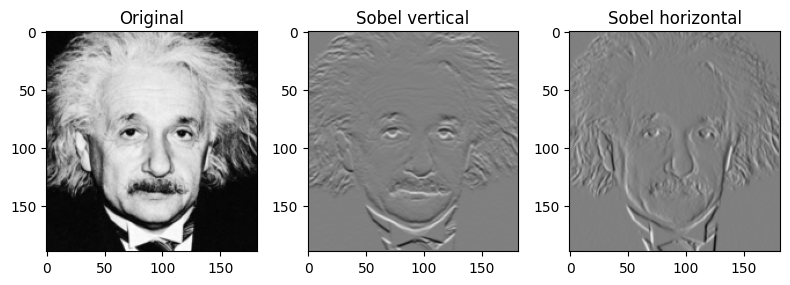

In [203]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float32')

kernel1 = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = 'float')
kernel2 = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = 'float')

img_v = cv.filter2D(img, -1, kernel1)
img_h = cv.filter2D(img, -1, kernel2)

f, ax = plt.subplots(1,3, figsize = (8,8))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')

ax[1].imshow(img_v, cmap = 'gray',vmin=-1020, vmax=1020)
ax[1].set_title('Sobel vertical')

ax[2].imshow(img_h, cmap = 'gray',vmin=-1020, vmax=1020)
ax[2].set_title('Sobel horizontal')

plt.tight_layout()

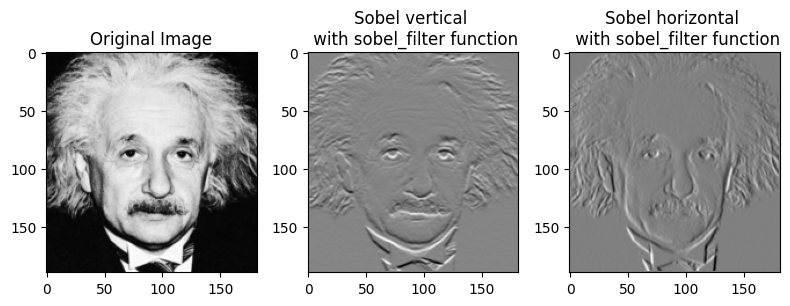

In [204]:
def sobel_filter(image, kernel):
  assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
  k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
  h, w = image.shape
  image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
  image_float = image.astype('float') / 255.0
  result = np.zeros(image.shape, 'float')

  for m in range(k_hh, h - k_hh):
    for n in range(k_hw, w - k_hw):
      result[m,n] = np.dot(image_float[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(), kernel.flatten())

  result = (result*255.0)
  return result

img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

img1 = sobel_filter(img, kernel1)
img2 = sobel_filter(img, kernel2)

f, ax = plt.subplots(1, 3, figsize = (8,8))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title("Original Image")

ax[1].imshow(img1, cmap = 'gray')
ax[1].set_title("Sobel vertical \n with sobel_filter function")

ax[2].imshow(img2, cmap = 'gray')
ax[2].set_title("Sobel horizontal \n with sobel_filter function")

plt.tight_layout()

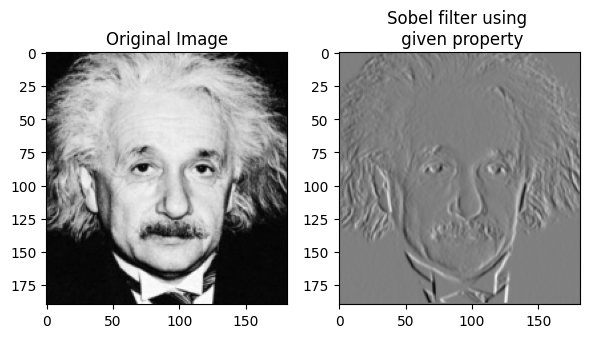

In [205]:
import scipy

array1 = np.array([[1], [2], [1]])
array2 = np.array([[1, 0, -1]])

new_kernel = scipy.signal.convolve2d(array1, array2)

img1 = sobel_filter(img, new_kernel)

f, ax = plt.subplots(1, 2, figsize = (6,6))

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title("Original Image")

ax[1].imshow(img1, cmap = 'gray')
ax[1].set_title("Sobel filter using \n given property")

plt.tight_layout()

## Question 8

Normalized SSD (Nearest-Neighbor) for image 1:  187.61082722479424
Normalized SSD (Bilinear Interpolation) for image 1: 161.74238972479424 

Normalized SSD (Nearest-Neighbor) for image 2:  187.75685099283854
Normalized SSD (Bilinear Interpolation) for image 2: 183.22671370442708 



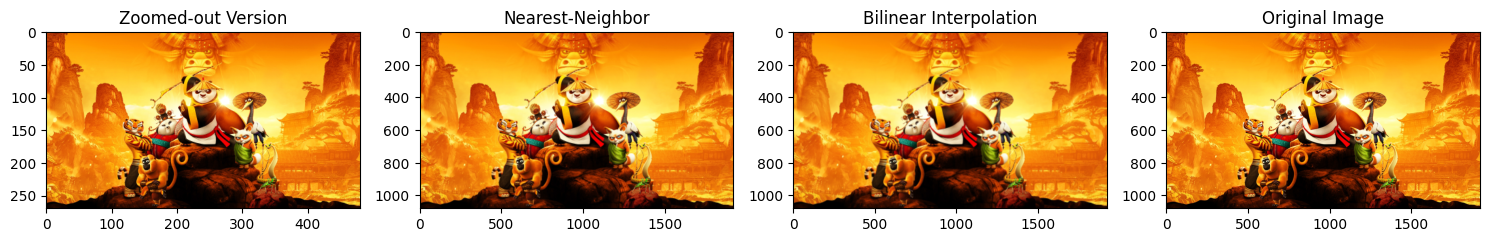

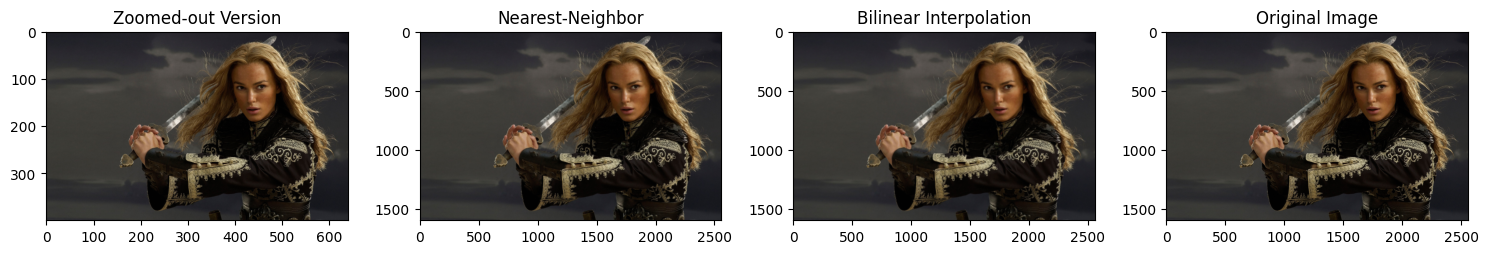

In [206]:
zoomed_outs = ['zooming\im06small.png', 'zooming\im07small.png']
original_image = ["zooming\im06.png", "zooming\im07.png"]

def calculate_normalized_ssd(image1, image2):
    h, w = image1.shape[:2]
    diff = image1.astype(np.float64) - image2.astype(np.float64)
    squared_diff = diff ** 2
    ssd = np.sum(squared_diff)
    normalized_ssd = ssd / (h*w*3)
    return normalized_ssd

for i in range(2):
    img = cv.imread(original_image[i])
    img1 = cv.imread(zoomed_outs[i])
    zoomed_nn = cv.resize(img1, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    zoomed_bi = cv.resize(img1, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)
    # Calculate the normalized SSD for nearest-neighbor and bilinear interpolation
    ssd_nn = calculate_normalized_ssd(img, zoomed_nn)
    ssd_bi = calculate_normalized_ssd(img, zoomed_bi)
    # Display the results
    print(f"Normalized SSD (Nearest-Neighbor) for image {i+1}:  {ssd_nn}")
    print(f"Normalized SSD (Bilinear Interpolation) for image {i+1}: {ssd_bi} \n")
    
    fig, ax = plt.subplots(1,4, figsize=(15,15))
    ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
    ax[0].set_title("Zoomed-out Version")

    ax[1].imshow(cv.cvtColor(zoomed_nn,cv.COLOR_BGR2RGB))
    ax[1].set_title("Nearest-Neighbor")

    ax[2].imshow(cv.cvtColor(zoomed_bi,cv.COLOR_BGR2RGB))
    ax[2].set_title("Bilinear Interpolation")
    
    ax[3].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[3].set_title("Original Image")

    plt.tight_layout()

## Question 9

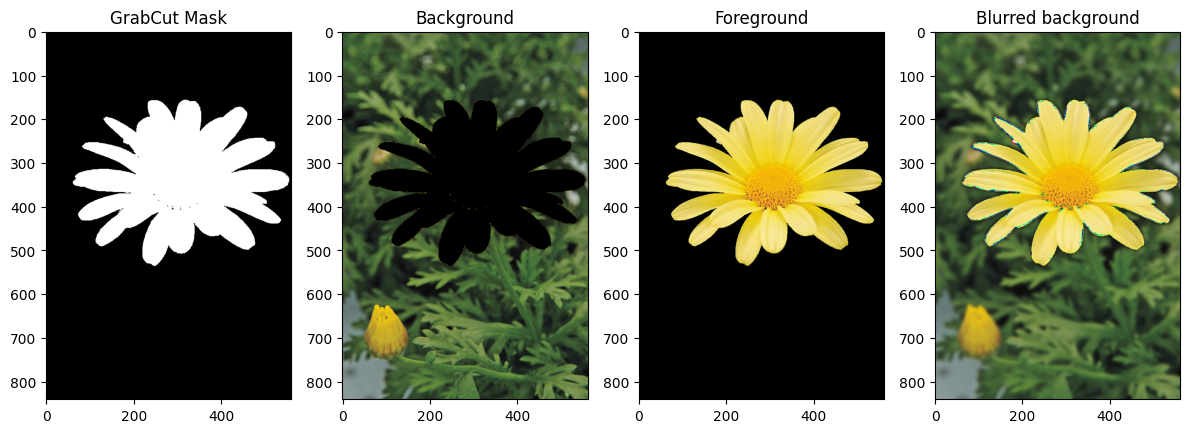

In [207]:
image = cv.imread('flower.jpg')

mask = np.zeros(image.shape[:2], np.uint8)
rect = (50,50,505,505)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]
background = image * (1 - mask2[:, :, np.newaxis])

blured_image = segmented_image + cv.GaussianBlur(background, (19,19), 0)

f, ax = plt.subplots(1, 4, figsize=(12,12))

ax[0].imshow(mask2 , cmap='gray')
ax[0].set_title('GrabCut Mask')

ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
ax[1].set_title('Background')

ax[2].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Foreground')

ax[3].imshow(cv2.cvtColor(blured_image, cv2.COLOR_BGR2RGB), cmap='gray')
ax[3].set_title('Blurred background')

plt.tight_layout()
plt.show()
